In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 110)
df = pd.read_csv('final_2.csv')

In [4]:
_hicov2 = df.loc[df['HICOV'].eq('Not Insured')]
_hicov1 = df.loc[df['HICOV'].eq('Insured')]


### Plotting distribution by Age

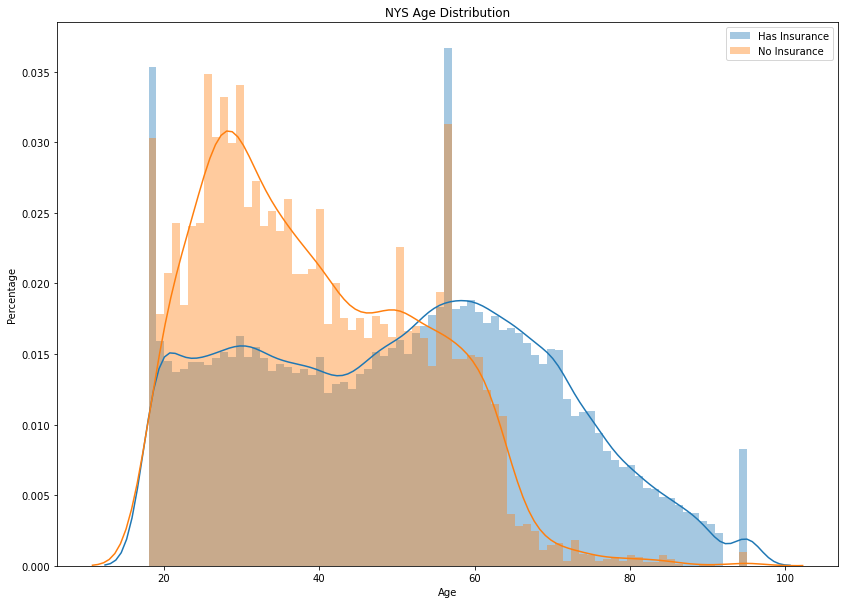

In [5]:
plt.figure(figsize=(14,10))
sns.distplot(_hicov1['AGEP'], label = 'Has Insurance', bins = 75)
sns.distplot(_hicov2['AGEP'], label = 'No Insurance', bins = 75)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('NYS Age Distribution')
plt.savefig('NYS Age Distribution', bbox_inches = 'tight',pad_inches = 0);

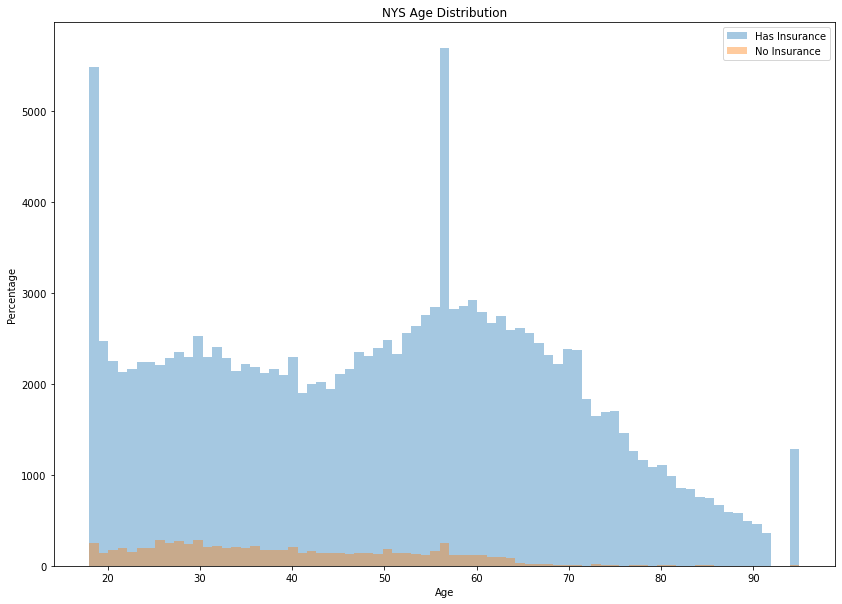

In [6]:
plt.figure(figsize=(14,10))
sns.distplot(_hicov1['AGEP'], label = 'Has Insurance', bins = 75, kde=False)
sns.distplot(_hicov2['AGEP'], label = 'No Insurance', bins = 75, kde=False)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('NYS Age Distribution')
plt.savefig('NYS Age Distribution', bbox_inches = 'tight',pad_inches = 0);

### Kruskal-Whallis: non-parametric version of ANOVA

In [14]:
from scipy import stats

# null: Insured Age Median == Not Insured Age Median
# alt: Insured Age Median != Not Insured Age Median
# alpha: 0.05
stats.kruskal(_hicov1['AGEP'], _hicov2['AGEP'])

# reject null in favor of alt. Age medians between two classes are DIFFERENT.

KruskalResult(statistic=2455.477899948028, pvalue=0.0)

### Chi2 on Gender

In [15]:
_albert = df.copy()

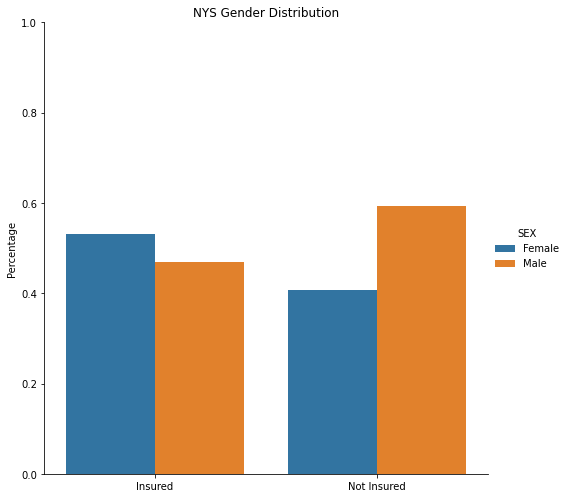

In [16]:
_albert_SEX = _albert.groupby(['HICOV'])['SEX'].value_counts(normalize=True)
_albert_SEX = _albert_SEX.rename('Percentage').reset_index()
# fig,ax = plt.subplots(figsize=(14,10))
# fig, ax = plt.subplots()
g = sns.catplot(x='HICOV', y= 'Percentage', hue='SEX', kind='bar', data= _albert_SEX, height=7)
# plt.figure(figsize=(14,10))
# sns.catplot(x=)
g.ax.set_ylim(0,1)
# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)
plt.title('NYS Gender Distribution')
plt.xlabel('')
plt.savefig('NYS Gender Distribution', bbox_inches = 'tight',pad_inches = 0);


In [19]:
ct = pd.crosstab(_albert['HICOV'],_albert['SEX'])
ct

SEX,Female,Male
HICOV,,
Insured,80236,71084
Not Insured,3247,4732


In [20]:
# null: Insured Sex Proportion == Not Insured Sex Proportion
# alt: Insured Sex Proportion != Not Insured Sex Proportion
# alpha: 0.05
stats.chi2_contingency(ct)
# reject null in favor of alternative

(461.46777692244973,
 2.303980258833421e-102,
 1,
 array([[79301.48688943, 72018.51311057],
        [ 4181.51311057,  3797.48688943]]))

### Chi2 on Marriage Status

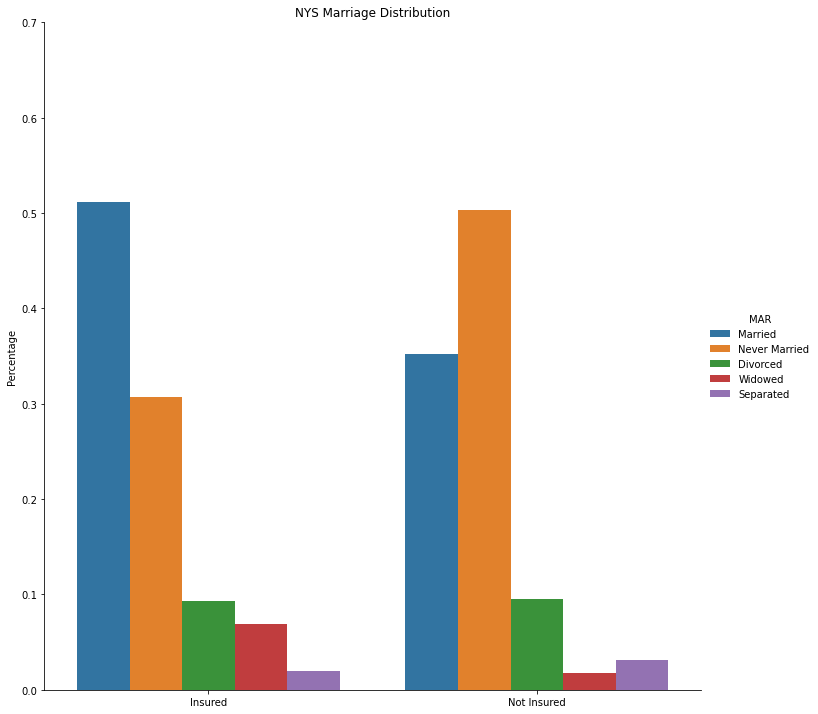

In [32]:
_albert_MAR = _albert.groupby(['HICOV'])['MAR'].value_counts(normalize=True)
_albert_MAR = _albert_MAR.rename('Percentage').reset_index()
# fig,ax = plt.subplots(figsize=(14,10))
g = sns.catplot(x='HICOV', y= 'Percentage', hue='MAR', kind='bar', data= _albert_MAR, height = 10)
g.ax.set_ylim(0,.7)
# plt.figure(figsize=(14,10))
# sns.catplot(x=)
plt.xlabel('')
plt.title('NYS Marriage Distribution')
plt.savefig('NYS Marriage Distribution', bbox_inches = 'tight',pad_inches = 0);

In [11]:
ct = pd.crosstab(_albert['HICOV'], _albert['MAR'])
ct

MAR,Divorced,Married,Never Married,Separated,Widowed
HICOV,,,,,
Insured,14113,77380,46428,3034,10365
Not Insured,757,2812,4019,251,140


In [13]:
# null: Insured Marriage Status Proportion == Not Insured Marriage Status Proportion
# alt: Insured Marriage Status Proportionn != Not Insured Marriage Status Proportion
# alpha: 0.05
stats.chi2_contingency(ct)
# reject null in favor of alternative

(1654.4480429641162,
 0.0,
 4,
 array([[14125.18848204, 76175.32715209, 47920.20062901,  3120.46026654,
          9978.82347033],
        [  744.81151796,  4016.67284791,  2526.79937099,   164.53973346,
           526.17652967]]))